<a href="https://colab.research.google.com/github/vghegde/AI-ML/blob/main/vinay_gangadhar_hegde_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [ ]:
#mounting dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing all libraries.
from glob import glob


import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Rescaling

import seaborn as sns

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

  

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classses = len(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

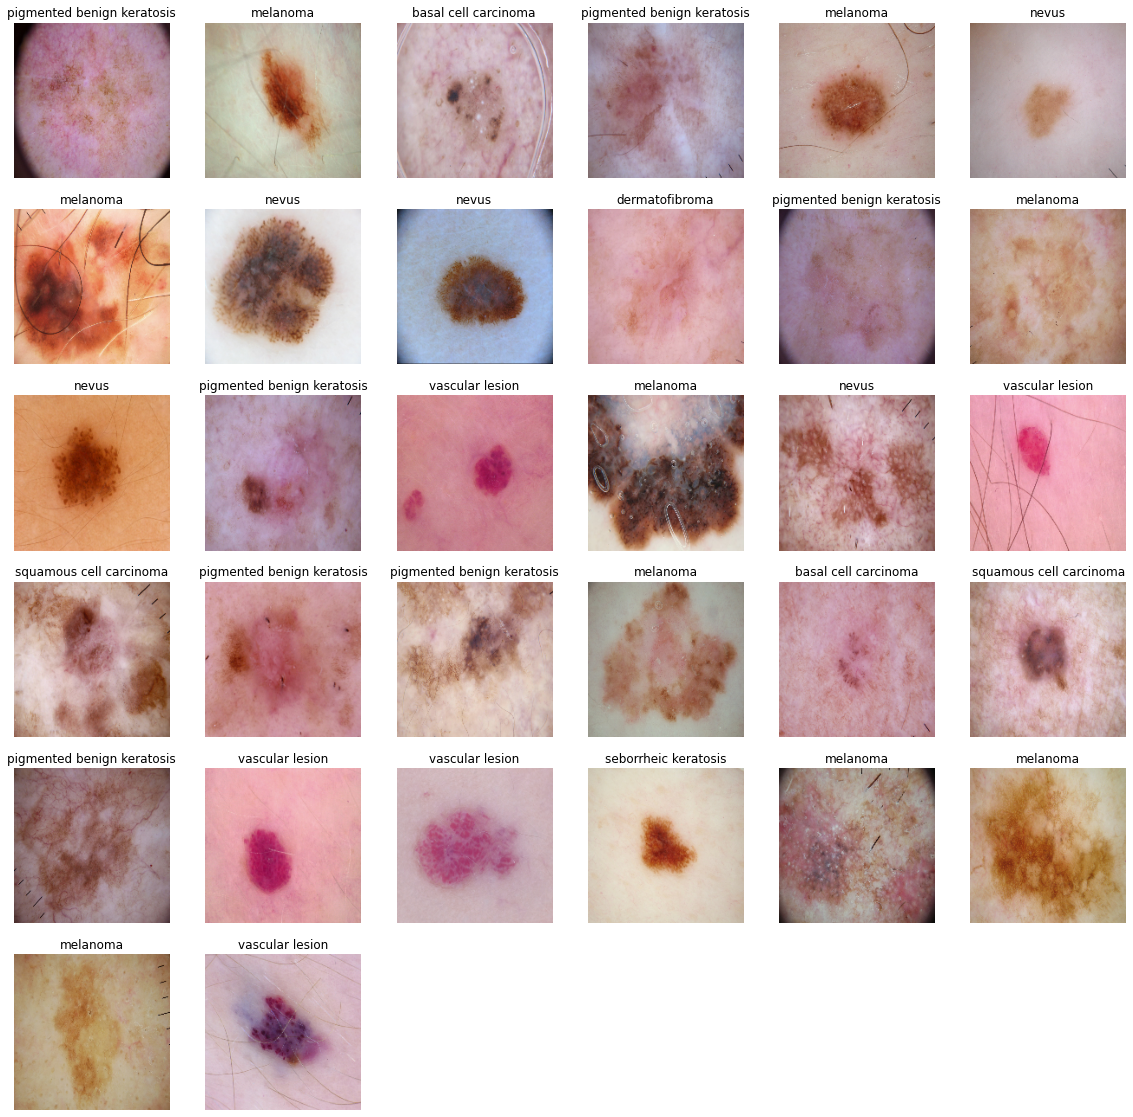

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
#Normalizing layer , which normalizes pixel calues in range 0-1.
normalize_layer = layers.Rescaling(1.0/255)

In [ ]:
#Building first model
from matplotlib.cbook import flatten
from tensorflow.python.keras.engine import input_layer
### Your code goes here
def modelv1(img_height,img_width,num_classses):
  model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    layers.Conv2D(128,3,padding='same', activation='relu'),
    MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_classses,activation='softmax')])
  return model;


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### compiling the module. 
model1 = modelv1(img_height,img_width,num_classses)
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Train the model

In [ ]:
#Train model function
epochs=20
def train_model(model,train_ds, val_ds, epochs=20):
  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
  )
  return history

### Visualizing training results

In [ ]:

def visualuze_results(history,epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [ ]:
history = train_model(model1,train_ds,val_ds)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 294s 1s/step - loss: 2.1423 - accuracy: 0.1933 - val_loss: 2.0455 - val_accuracy: 0.2004
Epoch 2/20
57/57 [==============================] - 1s 22ms/step - loss: 1.8240 - accuracy: 0.3439 - val_loss: 1.5660 - val_accuracy: 0.4677
Epoch 3/20
57/57 [==============================] - 1s 22ms/step - loss: 1.5334 - accuracy: 0.4572 - val_loss: 1.7082 - val_accuracy: 0.3786
Epoch 4/20
57/57 [==============================] - 1s 22ms/step - loss: 1.4203 - accuracy: 0.4944 - val_loss: 1.4633 - val_accuracy: 0.4944
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 1.2859 - accuracy: 0.5372 - val_loss: 1.4900 - val_accuracy: 0.4588
Epoch 6/20
57/57 [==============================] - 1s 22ms/step - loss: 1.2146 - accuracy: 0.5756 - val_loss: 1.3855 - val_accuracy: 0.5033
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 1.1424 - accuracy: 0.5889 - val_loss: 1.4509 - val_accuracy: 0.4744
Epoch 8/20
57/57 [======

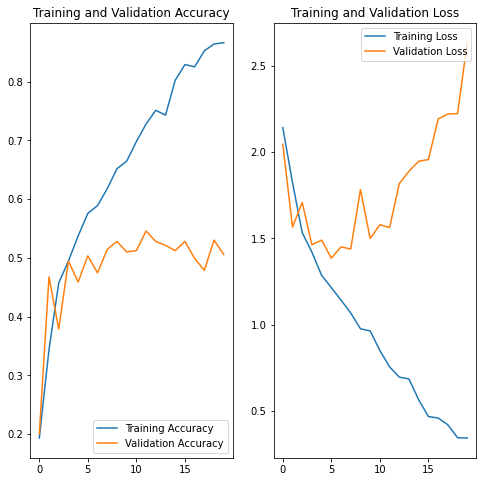

In [ ]:
visualuze_results(history,epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Observations are as below:

1.   We see that there is a hug gap between train ans test accuracy. which imples that model is overfitting.

2.   We also see in each epoch error goes on increasing in case of validation data set.

3.   We also see that the training data is very limited so this can be one of the reasons for overfitting. Model didnt get to see enough images to get a generic notion to classify images.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

#We use randomflip, rotation and Zoom for single image to get some diversity. 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

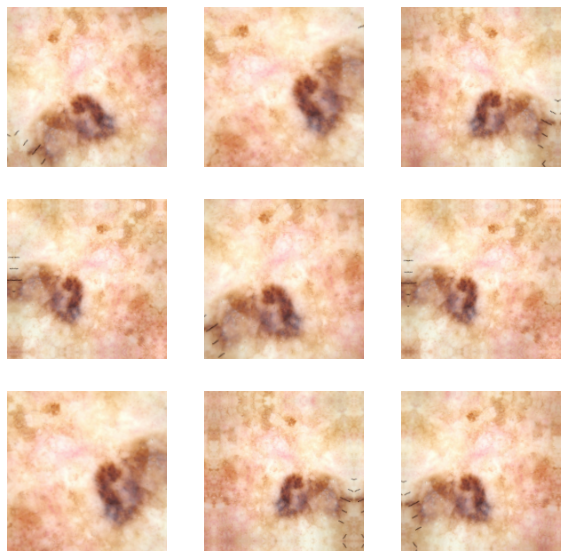

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Creating model after data augmentation


In [ ]:
## We will build new model and we willa lso add dropouts to address overfitting issue.

def modelWithAugmentation(img_height,img_width,num_classses):
  model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    layers.Conv2D(128,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    layers.Flatten(),
    
    layers.Dense(256,activation='relu'),
    Dropout(0.25),
    layers.Dense(num_classses,activation='softmax')])
  return model;



### Compiling the model

In [ ]:
model_augmented = modelWithAugmentation(img_height,img_width,num_classses)

model_augmented.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_augmented.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

### Training the model

In [ ]:
#Lets retrain model for 20 epochs

epochs = 20
history = train_model(model_augmented, train_ds, val_ds,epochs)
# history = model_augmented.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 2s 28ms/step - loss: 2.5970 - accuracy: 0.1917 - val_loss: 2.0666 - val_accuracy: 0.2027
Epoch 2/20
57/57 [==============================] - 1s 26ms/step - loss: 1.9085 - accuracy: 0.3161 - val_loss: 1.8408 - val_accuracy: 0.3207
Epoch 3/20
57/57 [==============================] - 1s 26ms/step - loss: 1.7191 - accuracy: 0.3744 - val_loss: 1.7373 - val_accuracy: 0.3497
Epoch 4/20
57/57 [==============================] - 1s 26ms/step - loss: 1.6142 - accuracy: 0.4217 - val_loss: 1.7024 - val_accuracy: 0.4254
Epoch 5/20
57/57 [==============================] - 1s 26ms/step - loss: 1.6179 - accuracy: 0.4228 - val_loss: 1.6412 - val_accuracy: 0.4076
Epoch 6/20
57/57 [==============================] - 1s 26ms/step - loss: 1.5701 - accuracy: 0.4550 - val_loss: 1.5922 - val_accuracy: 0.4454
Epoch 7/20
57/57 [==============================] - 1s 26ms/step - loss: 1.5465 - accuracy: 0.4578 - val_loss: 1.5655 - val_accuracy: 0.4499
Epoch 8/20
57/57 [======

### Visualizing the results

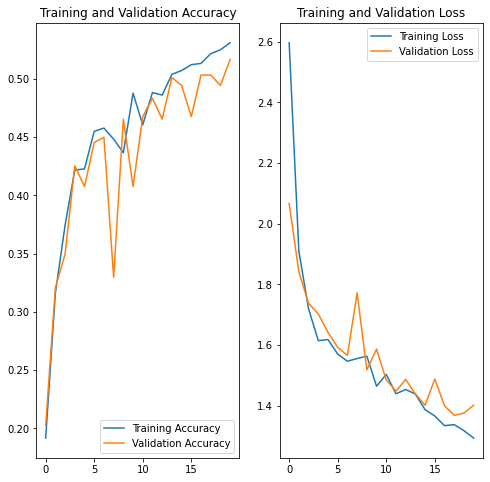

In [ ]:
visualuze_results(history, epochs)

### Observations


- We see that the differece between train and test accuracy has reduced compared to previous model, but overall accuracy has come down drastically.
- Now it seems like the model is underfitting.





#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
### Finding distribution of data among classes in dataset

classes = np.concatenate([y for x,y in train_ds])
uniq = np.unique(classes,return_counts=True)
class_dict = dict(zip(uniq[0],uniq[1]))
class_dict

{0: 88, 1: 309, 2: 77, 3: 354, 4: 276, 5: 372, 6: 61, 7: 143, 8: 120}

In [ ]:
classes = class_dict.keys()
counts = class_dict.values()
class_dis = pd.DataFrame({'class_label':list(classes),'counts':list(counts)}) 
class_dis

,class_label,counts
0,0,88
1,1,309
2,2,77
3,3,354
4,4,276
5,5,372
6,6,61
7,7,143
8,8,120


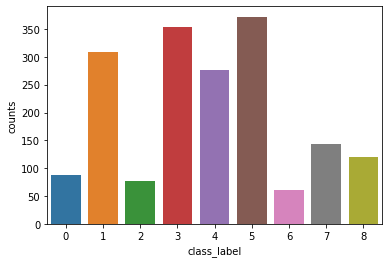

In [ ]:
sns.barplot(x=class_dis.class_label,y=class_dis.counts)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
##### - class 6 has minimum no of samples (61)
#### - Which classes dominate the data in terms proportionate number of samples?
#### - classes 1,3,5 dominate the dataset


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
path_to_training_dataset="/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/"
import Augmentor
for i in class_names:
  print(path_to_training_dataset + i)
  p = Augmentor.Pipeline(path_to_training_dataset + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC2CD2E73D0>: 100%|██████████| 500/500 [00:09<00:00, 52.93 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC2CD1D6C90>: 100%|██████████| 500/500 [00:10<00:00, 49.11 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC2CE998210>: 100%|██████████| 500/500 [00:10<00:00, 49.47 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC2CA64EF10>: 100%|██████████| 500/500 [00:42<00:00, 11.78 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/nevus
Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC2CDDFEC50>: 100%|██████████| 500/500 [00:37<00:00, 13.24 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC2CDF1BC90>: 100%|██████████| 500/500 [00:09<00:00, 55.20 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC2CD9E5890>: 100%|██████████| 500/500 [00:20<00:00, 24.01 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/squamous cell carcinoma
Initialised with 184 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC2CBBCA6D0>: 100%|██████████| 500/500 [00:08<00:00, 55.98 Samples/s]


/content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/vascular lesion
Initialised with 146 image(s) found.
Output directory set to /content/drive/MyDrive/AI-ML/DL/CNN/malenoma-detection/melanoma-dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC2CD8CCED0>: 100%|██████████| 500/500 [00:09<00:00, 54.34 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_new = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
dataframe_dict_new['Label'].value_counts()

melanoma                      500
dermatofibroma                500
basal cell carcinoma          500
vascular lesion               500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
actinic keratosis             500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180


#### **Todo:** Create a training dataset

In [ ]:
#Read augmented data for training set
train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
#Read augmented data as validation set
val_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


#Creating model post Augmented images 


In [ ]:
## your code goes here
def model_post_augmentor(img_height,img_width,num_classses):
  model = Sequential([
    #data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),

    layers.Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),


    layers.Conv2D(128,3,padding='same', activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),
    layers.Flatten(),
    
    layers.Dense(256,activation='relu'),
    Dropout(0.5),
 
    layers.Dense(num_classses,activation='softmax')])
  return model;

### Compile the model

In [ ]:

###  choosing an appropirate optimiser and loss function
model_post_augmentor= model_post_augmentor(img_height,img_width,num_classses)
model_post_augmentor.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_post_augmentor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

#### **Todo:**  Train your model

In [ ]:
epochs = 50
#training mdoel with 50 epochs
history = train_model(model_post_augmentor, train_ds_augmented, val_ds_augmented,epochs)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 24s 133ms/step - loss: 2.4652 - accuracy: 0.1296 - val_loss: 2.1871 - val_accuracy: 0.1401
Epoch 2/50
169/169 [==============================] - 22s 126ms/step - loss: 2.1790 - accuracy: 0.1478 - val_loss: 2.1590 - val_accuracy: 0.1890
Epoch 3/50
169/169 [==============================] - 21s 116ms/step - loss: 2.1268 - accuracy: 0.1672 - val_loss: 1.9219 - val_accuracy: 0.2787
Epoch 4/50
169/169 [==============================] - 19s 106ms/step - loss: 1.7611 - accuracy: 0.3272 - val_loss: 1.5190 - val_accuracy: 0.4085
Epoch 5/50
169/169 [==============================] - 19s 107ms/step - loss: 1.5202 - accuracy: 0.4061 - val_loss: 1.4341 - val_accuracy: 0.4522
Epoch 6/50
169/169 [==============================] - 19s 106ms/step - loss: 1.4192 - accuracy: 0.4591 - val_loss: 1.3730 - val_accuracy: 0.4893
Epoch 7/50
169/169 [==============================] - 19s 106ms/step - loss: 1.3378 - accuracy: 0.4841 - val_loss: 1.2510 - val_accuracy: 0.5

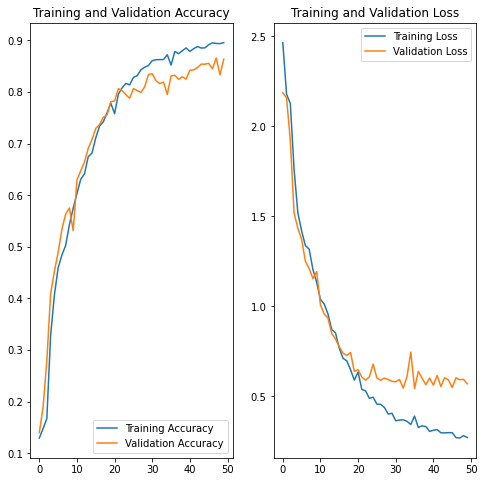

In [ ]:
visualuze_results(history,epochs)

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.  We see that after creating extra images using Augmentor library which addressed class imbalance issue, both train and validation accuracy has gone up. 
2.  We also see that overfitting is also reduced as both Test and Vlaidation accuracy follow similar trend in graph.
3.  We also see that increasing dropout percentage helped reduce overfitting.

